In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [96]:
df=pd.read_csv(r"C:\Users\Dhananjay\Desktop\excel\sales_data.csv",encoding="unicode_escape")

In [97]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,AGE_GROUP,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [98]:
df.shape

(11251, 13)

In [99]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [100]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
AGE_GROUP            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   AGE_GROUP         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [102]:
df["Marital_Status"]=df["Marital_Status"].astype("str")

In [103]:
df["Marital_Status"]=df["Marital_Status"].replace("0","M")
df["Marital_Status"]=df["Marital_Status"].replace("1","UM")

In [104]:
df=df.dropna()

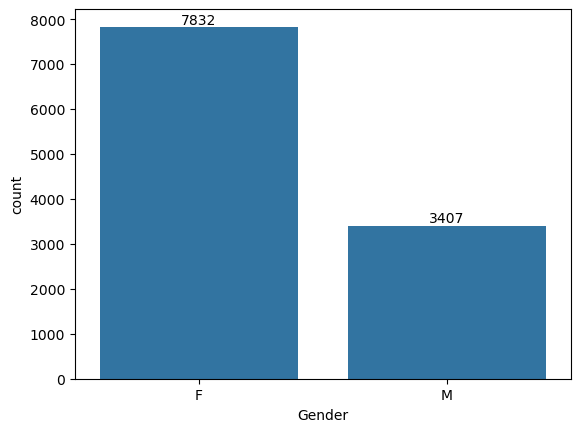

In [105]:
ax=sns.countplot(data=df,x="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [106]:
df_age_gender=df.groupby(["AGE_GROUP","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

Text(0.5, 1.0, 'AGE_GROUP Vs AMOUNT')

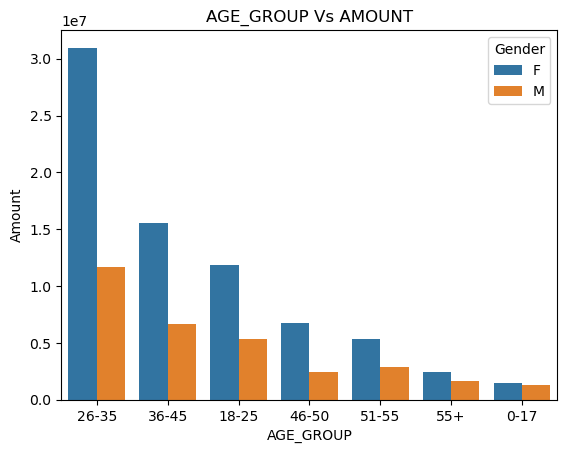

In [107]:
sns.barplot(data=df_age_gender,x="AGE_GROUP",y="Amount",hue="Gender")
plt.title("AGE_GROUP Vs AMOUNT")

In [108]:
df_age_gender=df.groupby(["AGE_GROUP","Gender"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)

Text(0.5, 1.0, 'AGE_GROUP Vs Orders')

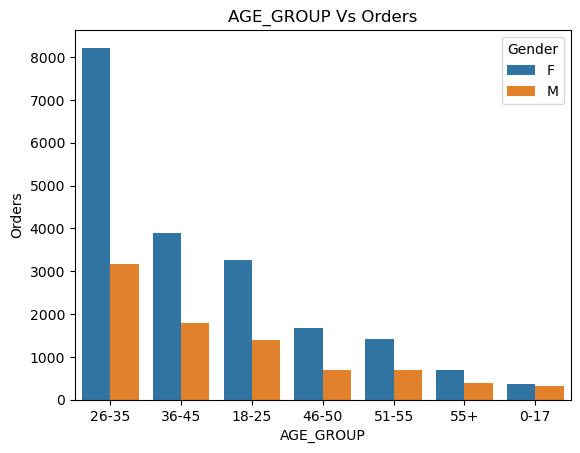

In [109]:
sns.barplot(data=df_age_gender,x="AGE_GROUP",y="Orders",hue="Gender")
plt.title("AGE_GROUP Vs Orders")

In [110]:
df_marital_gender=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

Text(0.5, 1.0, 'Marital_Status Vs Amount')

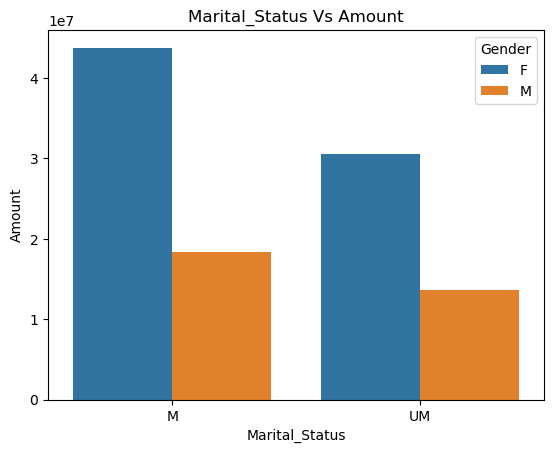

In [111]:
sns.barplot(data=df_marital_gender,x="Marital_Status",y="Amount",hue="Gender")
plt.title("Marital_Status Vs Amount")

In [112]:
df_state=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(3)

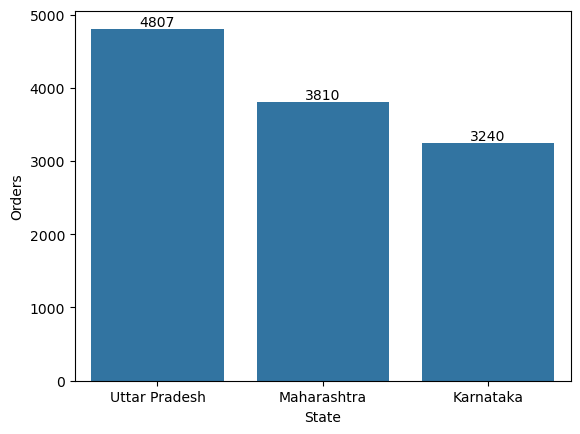

In [113]:
ax=sns.barplot(data=df_state,x="State",y="Orders")
for bars in ax.containers:
    ax.bar_label(bars)


In [114]:
df_Occupation=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

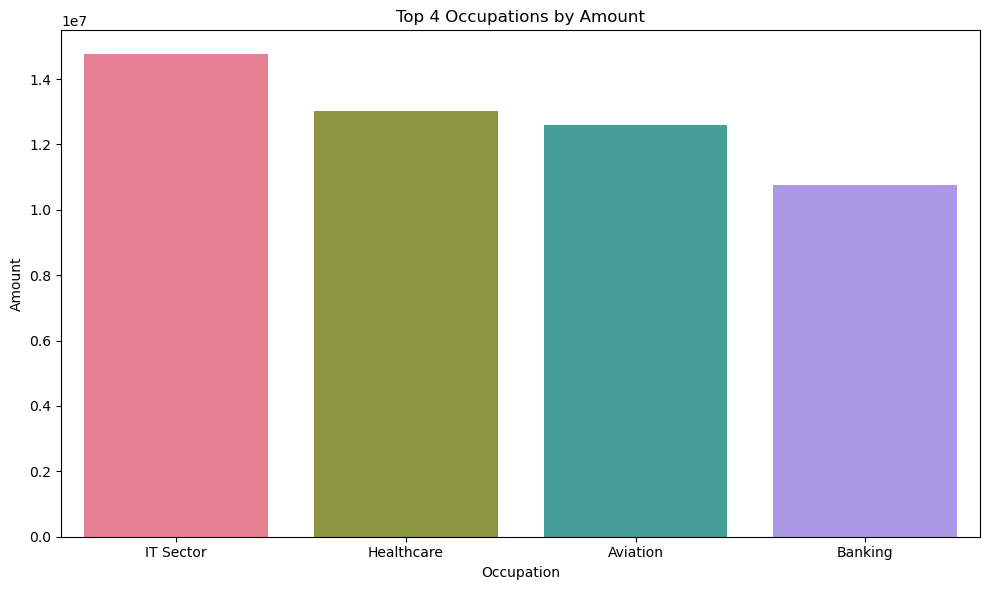

In [115]:
df_top4=df_Occupation.head(4)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top4, x="Occupation", y="Amount",palette="husl")  
plt.title("Top 4 Occupations by Amount")
plt.tight_layout()
plt.show()


In [116]:
df_product=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

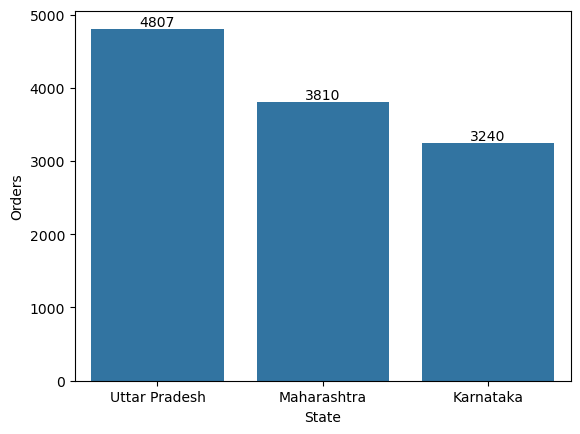

In [117]:
ax = sns.barplot(data=df_state, x="State", y="Orders")
for container in ax.containers:
    ax.bar_label(container)

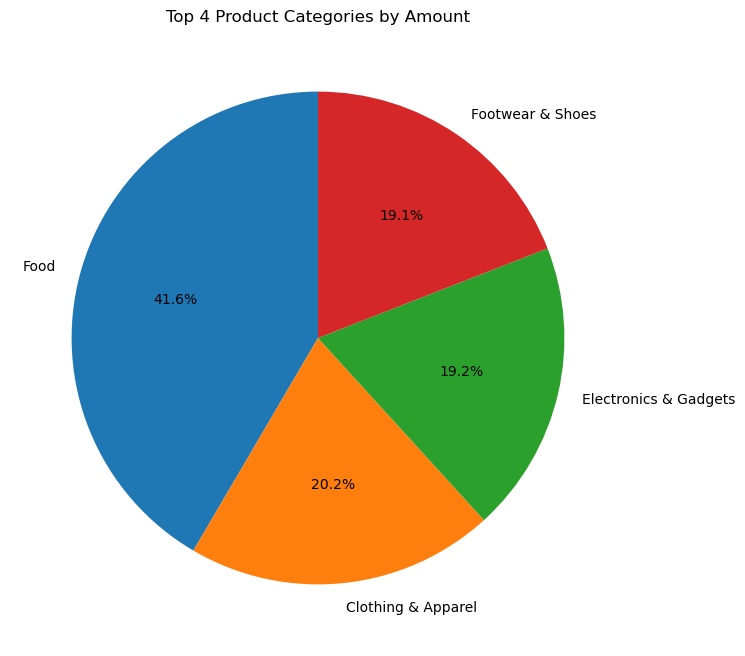

In [118]:
df_product = df_product.reset_index(drop=True)
sizes = df_product["Amount"].values
labels = df_product["Product_Category"].values
plt.figure(figsize=(8,8))
plt.pie(sizes[:4], labels=labels[:4], autopct="%1.1f%%", startangle=90)
plt.title("Top 4 Product Categories by Amount")
plt.show()

<Axes: ylabel='count'>

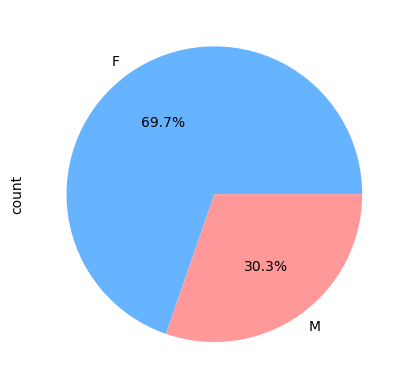

In [119]:
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#66b3ff","#ff9999"])


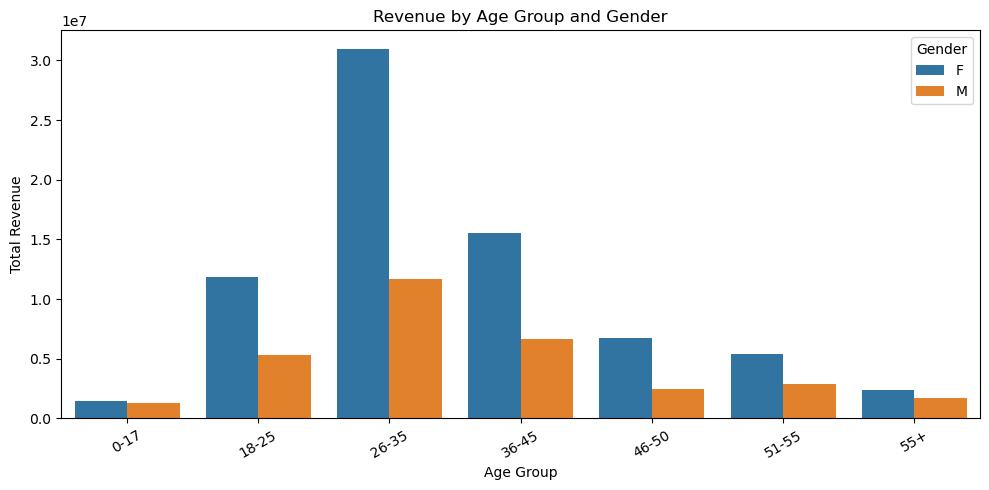

In [120]:
age_order = df.groupby('AGE_GROUP')['Age'].mean().sort_values().index # sensible order
df_age_gender = df.groupby(['AGE_GROUP','Gender'], as_index=False)['Amount'].sum()
plt.figure(figsize=(10,5))
sns.barplot(data=df_age_gender, x='AGE_GROUP', y='Amount', hue='Gender', order=age_order)
plt.title("Revenue by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [121]:
age_stats = df.groupby('AGE_GROUP').agg(Orders=('Orders','sum'), Revenue=('Amount','sum'))
age_stats['AOV'] = age_stats['Revenue'] / age_stats['Orders']
age_stats = age_stats.sort_values('AOV', ascending=False).reset_index()
print(age_stats[['AGE_GROUP','Orders','Revenue','AOV']])

  AGE_GROUP  Orders      Revenue          AOV
0      0-17     690   2699653.00  3912.540580
1     51-55    2112   8261477.00  3911.684186
2     36-45    5687  22144995.49  3893.967908
3     46-50    2371   9207844.00  3883.527625
4       55+    1076   4080987.00  3792.738848
5     26-35   11395  42613443.94  3739.661601
6     18-25    4650  17240732.00  3707.684301


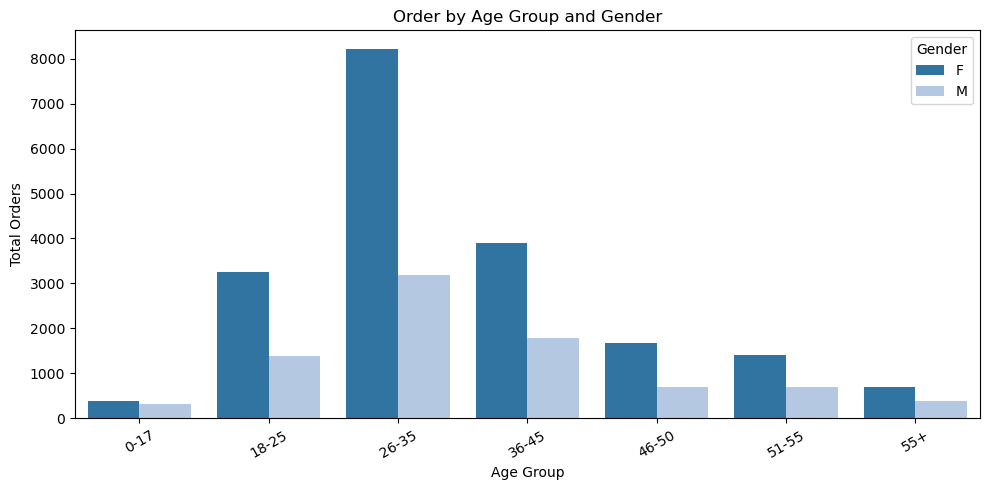

In [122]:
df_age_orders = df.groupby(['AGE_GROUP','Gender'], as_index=False)['Orders'].sum()
plt.figure(figsize=(10,5))
sns.barplot(data=df_age_orders, x='AGE_GROUP',y='Orders',hue='Gender',order=age_order,palette='tab20')
plt.title('Order by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Orders')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Insights

#### Revenue performance is primarily driven by customers aged 26–35, with higher engagement from female and married segments, while Uttar Pradesh, Maharashtra, and Karnataka dominate both revenue and order volume, and IT Sector and Healthcare categories deliver the strongest profitability.